now that E4 works, E5 isn't working of course. 
ELI2 is giving negative numbers. something is wrong with either the function or the transformation! 


I BELIEVE ElI2 IS INCORRECT

In [22]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_formir import *
from random import uniform
import random
import matplotlib
#matplotlib auto
#%matplotlib inline

In [23]:
#as always, testing/rewriting ELI
#see page 14 in new notebook
#p = [x0,y0,z0] (of line)
#v = [a,b,c] (of line)
#coeffellipse = [a,b,c] of ellipse = [d,e,f] of ellipsoid (as written). 
def ELIorganize(p,v,coeffellipse):
    return p[0], p[1],p[2],v[0],v[1],v[2],coeffellipse[0],coeffellipse[1]
    
def ELI2(p,v,coeffellipse):
    x0,y0,z0,a,b,c,d,e = ELIorganize(p,v,coeffellipse)
    A = (e**2)/(d**2) + (b**2)/(a**2) + (c**2)/(a**2)
    B = (-2*x0*b**2)/(a**2) + (2*y0*b)/(a) + (-2*x0*c**2)/(a**2) + (2*z0*b)/(a**2)
    C = ((x0**2)*(b**2))/(a**2) + (-2*y0*b*x0)/(a) + y0**2 + ((x0**2)*(c**2))/(a**2) + (-2*z0*c*x0)/(a) + z0**2 - e**2
    xint = [(-B + np.sqrt((B**2) - 4*A*C))/(2*A),(-B - np.sqrt((B**2) - 4*A*C))/(2*A)]
    t = [(xint[0]-x0)/a, (xint[1]-x0)/a]
    yint = [y0 +t[0]*b, y0 + t[1]*b]
    zint = [z0 + t[0]*c, z0 + t[1]*c]
    return xint,yint,zint
    
def ELI2test(p,v,coeffellipse):
    x0,y0,z0,a,b,c,d,e = ELIorganize(p,v,coeffellipse)
    A = (e**2)/(d**2) + (b**2)/(a**2) + (c**2)/(a**2)
    B = (-2*x0*b**2)/(a**2) + (2*y0*b)/(a) + (-2*x0*c**2)/(a**2) + (2*z0*b)/(a**2)
    C = ((x0**2)*(b**2))/(a**2) + (-2*y0*b*x0)/(a) + y0**2 + ((x0**2)*(c**2))/(a**2) + (-2*z0*c*x0)/(a) + z0**2 - e**2
    if ((B**2) - 4*A*C)> 0:
        return True
    else:
        return False

    
def REPCNi(coeffellipse,pli,v):
    Npos,Nneg = NormalP(pli,v,coeffellipse) #plane coefficients
    VectLNorm = N(v) #incident unit vector
    Npos = np.array([-x for x in Npos]) 
    Nneg = np.array([-x for x in Nneg])
    vectpos = VectLNorm - 2*N(Npos)*(np.dot(VectLNorm,N(Npos)))
    vectneg = VectLNorm - 2*N(Nneg)*(np.dot(VectLNorm,N(Nneg)))
    xint,yint,zint = ELI2(pli,v,coeffellipse)
    intpos = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    intneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    GoodInt,GoodVect = finddirec(pli,v,intpos,intneg,vectpos,vectneg)
    return GoodInt, GoodVect

#uses 3d ellipses for range, ellipse origin for center of DESIRED range, 
def RSEPCNi(coeffellipse,pli,vectors, ranges, ellipseorigin):
    Vect = []
    pointints = []
    if len(pli) == 0:
        return [],[]
    if type(pli[0]) is int or type(pli[0]) is float: #assuming it is a source from one point
        for i in range (0,len(vectors)):
            Gpoint,Gvect = REPCNi(coeffellipse,pli,vectors[i])
            if SR3B(ranges, Gpoint[0],Gpoint[1],Gpoint[2], ellipseorigin) == True:
                pointints.append(Gpoint)
                Vect.append(Gvect)
    else:
        for i in range (0, len(pli)):
            Vi = vectors[i]
            Pli = pli[i] #(or pli/original points of lines)
            Gpoint,Gvect = REPCNi(coeffellipse,Pli,Vi)
            if SR3B(ranges, Gpoint[0],Gpoint[1],Gpoint[2], ellipseorigin) == True:
                pointints.append(Gpoint)
                Vect.append(Gvect)
    return pointints, Vect

In [24]:
# ALL STARTING INFORMATION ABOUT THE FTS

originG = [0.,0.,0.] # the global origin
thetG = [0.,0.,0.] # rotation with respect to itself aka 0,0,0
origin1 = [-32.075,-128.,0.] #x,y (ellipse1)
origin2 = [64.15-32.075,-128.,0.] #x,y (ellipse2)
origin3 = [0-32.075,128.,0.] #x,y (ellipse3)
origin4 = [64.15-32.075,128,0.] #x,y  (ellipse4)
origin5 = [128.3-32.075,-120.501,0.] # (ellipse5)
origin6 = [128.3-32.075,120.501,0.] # (ellipse6)
origin7 = [160.375-32.075,7.5,40.]
origin8 = [-64.15-32.075,-120.501,0.]
origin9 = [-64.15-32.075,120.501,0.]
origin10 = [-96.225-32.075,7.5,-40.]


coeffellipse7 = [164.645,99.8,130.95] #for ellipse 7
coeffellipse56 = [256.65,248.39,64.58]  #for ellipses 5&6&8&9
coeffellipse = [263.9,256,64.15] #for center ellipses

thet = [0,0,0] #A
thet5 = [0,0,.1164] #testing
thet6 = [0,0,-.1164] #testing
thet7 = [0,.319422,1.3106]
thet10 = [0,.310422,-1.3106] #negative of thet7?
# NOW BUILDING ALL OF THE ELLIPSOIDS 
# SELECTING CORRESPONDING PARTS

#CENTER ELLIPSES
X1i,Y1i,Z1i,X2i,Y2i,Z2i = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'pos') #LOBAL
X1ni,Y1ni,Z1ni,X2ni,Y2ni,Z2ni = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'neg') #LOCAL
Xset1, Yset1, Zset1 = SR2(32.07, X1i,Y1i,Z1i, originG) #SELECTED LOCAL
Xset2, Yset2, Zset2 = SR2(32.07, X2i, Y2i, Z2i, originG) #SELECTED LOCAL
Xset1n, Yset1n, Zset1n = SR2(32.07, X1ni,Y1ni,Z1ni, originG) #SELECTED LOCAL
Xset2n, Yset2n, Zset2n = SR2(32.07, X2ni, Y2ni, Z2ni, originG) #SELECTED LOCAL
#ELLIPSE 1
X1,Y1,Z1 = transformLG(Xset1,Yset1,Zset1,origin1,thet) #GLOBAL
X2,Y2,Z2 = transformLG(Xset2,Yset2,Zset2,origin1,thet) #GLOBAL
center1,range1 = xrangeGL7(X1,Y1,Z1,X2,Y2,Z2,origin1,thet)
#ELLIPSE 2
X3,Y3,Z3 = transformLG(Xset1,Yset1,Zset1,origin2,thet) #GLOBAL
X4,Y4,Z4 = transformLG(Xset2,Yset2,Zset2,origin2,thet) #GLOBAL
center2,range2 = xrangeGL7(X3,Y3,Z3,X4,Y4,Z4,origin2,thet)
#ELLIPSE 3
X1n,Y1n,Z1n = transformLG(Xset1n,Yset1n,Zset1n,origin3,thet) #GLOBAL
X2n,Y2n,Z2n = transformLG(Xset2n,Yset2n,Zset2n,origin3,thet) #GLOBAL
center3,range3 = xrangeGL7(X1n,Y1n,Z1n,X2n,Y2n,Z2n,origin3,thet)
#ELLIPSE 4
X3n,Y3n,Z3n = transformLG(Xset1n,Yset1n,Zset1n,origin4,thet) #GLOBAL
X4n,Y4n,Z4n = transformLG(Xset2n,Yset2n,Zset2n,origin4,thet) #GLOBAL
center4,range4 = xrangeGL7(X3n,Y3n,Z3n,X4n,Y4n,Z4n,origin4,thet)


#ELLIPSE 5&6
X5i,Y5i,Z5i,X6i,Y6i,Z6i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 5
Xset5, Yset5, Zset5= transformLG(X5i,Y5i,Z5i,origin5,thet5) #GLOBAL
Xset6, Yset6, Zset6 = transformLG(X6i,Y6i,Z6i,origin5,thet5) #GLOBAL
X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5) #SELECTED GLOBAL
X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5) #SELECTED GLOBAL
center5,range5 = xrangeGL7(X5,Y5,Z5,X6,Y6,Z6,origin5,thet5)
#ELLIPSE 6
Xset5n,Yset5n,Zset5n = transformLG(X5ni,Y5ni,Z5ni,origin6,thet6) #GLOBAL
Xset6n,Yset6n,Zset6n = transformLG(X6ni,Y6ni,Z6ni,origin6,thet6) #GLOBAL
X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6) #SELECTED GLOBAL
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6) #SELECTED GLOBAL
center6,range6 = xrangeGL7(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)

#ELLIPSE 8&9
X9i,Y9i,Z9i,X10i,Y10i,Z10i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X9ni,Y9ni,Z9ni,X10ni,Y10ni,Z10ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 8
Xset9,Yset9,Zset9 = transformLG(X9i,Y9i,Z9i,origin8,thet6) #GLOBAL
Xset10,Yset10,Zset10 = transformLG(X10i,Y10i,Z10i,origin8,thet6) #GLOBAL
X9,Y9,Z9 = SR2(32.07, Xset9,Yset9,Zset9, origin8) #SELECTED GLOBAL
X10,Y10,Z10 = SR2(32.07, Xset10, Yset10, Zset10, origin8) #SELECTED GLOBAL
center8,range8 = xrangeGL7(X9,Y9,Z9,X10,Y10,Z10,origin8,thet6)
#ELLIPSE 9
Xset9n,Yset9n,Zset9n = transformLG(X9ni,Y9ni,Z9ni,origin9,thet5) #GLOBAL
Xset10n,Yset10n,Zset10n = transformLG(X10ni,Y10ni,Z10ni,origin9,thet5) #GLOBAL
X9n,Y9n,Z9n = SR2(32.07, Xset9n,Yset9n,Zset9n, origin9) #SELECTED GLOBAL
X10n,Y10n,Z10n = SR2(32.07, Xset10n, Yset10n, Zset10n, origin9) #SELECTED GLOBAL
center9,range9 = xrangeGL7(X9n,Y9n,Z9n,X10n,Y10n,Z10n,origin9,thet5)

#ELLIPSE 7
X7i,Y7i,Z7i,X8i,Y8i,Z8i = FTSEC(100,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset7,Yset7,Zset7 = transformLG(X7i,Y7i,Z7i,origin7,thet7) #GLOBAL
Xset8,Yset8,Zset8 = transformLG(X8i,Y8i,Z8i,origin7,thet7) #GLOBAL
Ecenter7 = [192.45-32.075,0,0] #GLOBAL SECTON
#Ecenter7 = [192.45,0,0]
X7,Y7,Z7 = SR10(32.07,Xset7, Yset7, Zset7, Ecenter7) #SELECTED GLOBAL
X8,Y8,Z8 = SR10(32.07,Xset8, Yset8, Zset8, Ecenter7) #SELECTED GLOBAL
center7,range7 = xrangeGL7(X7,Y7,Z7,X8,Y8,Z8,origin7,thet7) # LOCAL RANGE 
X7t,Y7t,Z7t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL
X8t,Y8t,Z8t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL

#ELLIPSE 10
X11i,Y11i,Z11i,X12i,Y12i,Z12i = FTSEC(100,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset11,Yset11,Zset11 = transformLG(X11i,Y11i,Z11i,origin10,thet10) #GLOBAL
Xset12,Yset12,Zset12 = transformLG(X12i,Y12i,Z12i,origin10,thet10) #GLOBAL
Ecenter10 = [-128.3-32.075,0,0] #GLOBAL SECTION
#Ecenter10 = [-128.3,0,0]
X11,Y11,Z11 = SR10(32.07, Xset11,Yset11,Zset11, Ecenter10) #SELECTED GLOBAL
X12,Y12,Z12 = SR10(32.07, Xset12,Yset12,Zset12, Ecenter10) #SELECTED GLOBAL
center10,range10, = xrangeGL6(X11,Y11,Z11,X12,Y12,Z12,origin10,thet10) #LOCAL RANGE 
X11t,Y11t,Z11t = SR103di(range10,X11i,Y11i,Z11i,center10) #LOCAL
X12t,Y12t,Z12t = SR103di(range10,X12i,Y12i,Z12i,center10) #LOCAL

coeffmirr = [31.75,25.4,19.05]
print('Continue')

Continue


In [25]:
#SOURCE SHOT UP AT E10
#creating the source (around the focus of E8) LOCALLY 
sourcepointorigin = [-130.95,0.,0.] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(1,sourcepointorigin,sourcethet) #LOCAL
sourcep1, sv1 = FS(100,sourcepoints, sourcethet,origin10) #LOCAL
points10, vects10 = RSEPCNi(coeffellipse7,sourcep1,sv1, range10,center10) #Reflection off of E10 (from source)
sp10,v10 = RT(points10, vects10,thet10,origin10,thet6,origin8) #from Local 10 to Local 8
points810,vects810 = RSEPCNi(coeffellipse56,sp10,v10,range8,center8) #Reflection off of E8 (from 10)
sp8,v8 = RT(points810,vects810,thet6,origin8,thet,origin3) #from Local 8 to Local 3
points38,vects38 = RSEPCNi(coeffellipse,sp8,v8,range3,center3) #Reflection off of E3 (from 8)

#MIRROR IS HERE, with mirror at y = 0
originmirrcent = [0.,0.,0.]
spM,vM = RT(points38,vects38,thet,origin3,thet,originG) #from Local 3 to Global Mirror
sMhit,sVhit,sMmiss,sVmiss = IntM(spM,vM,coeffmirr,originmirrcent) #reflection off of mirror
spMr,vMr = RT(sMhit,sVhit,thet,originG,thet,origin4) #from Global Mirror to Local 4 
#ABOVE testing if I am NOT supposed to shift?

points4M,vects4M = RSEPCNi(coeffellipse,spMr,vMr,range4,center4) #reflection off of E4 (from mirror)
#sp4i,v4i = RT(points4M,vects4M,thet,origin4,thet,originG) #from Local 4 to global
#sp4,v4 = RT(points4M,vects4M,thet,originG,thet5,origin5) #from Local 4 to Local 5'
sp4t,v4t = RT(points4M,vects4M,thet,origin4,thet5,origin5) #from Local 4 to Local 5
#points54,vects54 = RSEPCNi(coeffellipse56,sp4t,v4t,range5,center5) #reflection off of E5 (from E4)
#sp5,v5 = RT(points54,vects54,thet5,origin5,thet7,origin7) #from Local 5 to Local 7
#points75,vects75 = RSEPCNi(coeffellipse7,sp5,v5,range7,center7)
print('Continue')

Continue


#LOCAL 4
pl.plot(Xset1n, Yset1n)
pl.plot(Xset2n, Yset2n)
for i in range (len(points4M)):#local 4
    x,y,z = ML(points4M[i],vects4M[i],100)
    pl.plot(x,y, color = 'blue')
    pl.scatter(points4M[i][0],points4M[i][1])
pl.show()

#GLOBAL
pl.plot(X3n,Y3n)
pl.plot(X4n,Y4n)
for i in range (len(sp4i)):#local 4
    x,y,z = ML(sp4i[i],v4i[i],100)
    pl.plot(x,y, color = 'blue')
pl.show()

sp4,v4 = RT(points4M,vects4M,thet,originG,thet5,origin5) #from Local 4 to Local 5??
sp4t,v4t = RT(points4M,vects4M,thet,origin4,thet5,origin5) #from Local 4 to Local 5

pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (len(points4M)):
    x,y,z = ML(points4M[i],vects4M[i],100)
    pl3dsurf.plot(x,y,z, color = 'blue')
    
for i in range (len(sp4)): #from G to 5
    x,y,z = ML(sp4[i],v4[i],100)
    pl3dsurf.plot(x,y,z, color = 'green')
    
#for i in range (len(sp4t)): #FROM 4 to 5
    #x,y,z = ML(sp4t[i],v4t[i],100)
    #pl3dsurf.plot(x,y,z, color = 'red')
pl.show()

#local
X6i,Y6i,Z6i = transformGL(X6,Y6,Z6,origin5,thet5)
X5i,Y5i,Z5i = transformGL(X5,Y5,Z5,origin5,thet5)
pl.plot(X6i,Y6i, color = 'blue')
pl.plot(X5i,Y5i, color = 'blue')
for i in range (len(sp4t)): #local
    x,y,z = ML(sp4t[i],v4t[i],100)
    pl.plot(x,y, color = 'blue')

#global
pl.plot(X5,Y5, color = 'red')
pl.plot(X6,Y6,color = 'red')
for i in range (len(sp4i)): #global
    x,y,z = ML(sp4i[i],v4i[i],100)
    pl.plot(x,y, color = 'red')
pl.show()

#in local 5
#X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni
pl.plot(X5ni,Y5ni)
pl.plot(X6ni,Y6ni)
print('points')
for i in range(len(sp4)):
    print(sp4[i])
print ('vectors')
for i in range(len(sp4)):
    print(v4[i])
#first one isn't working, why?
print('intersection points')
for i in range(len(sp4)):
    x,y,z = ELI2(sp4[i],v4[i],coeffellipse56)
    print(x,y)
    pl.plot(x[0],y[0], color = 'black')
    pl.plot(x[1],y[1], color = 'black')

#for i in range (len(points4M)):
    #x,y,z = ML(points4M[i],vects4M[i], 100)
    #pl.plot(x,y,color = 'green')
for i in range (len(sp4)):
    x,y,z = ML(sp4[i], v4[i], 100)
    pl.plot(x,y, color = 'blue')
pl.show()

points4M,vects4M = RSEPCNi(coeffellipse,spMr,vMr,range4,center4) #reflection off of E4 (from mirror)
sp4i,v4i = RT(points4M,vects4M,thet,origin4,thet,originG) #from Local 4 to global
sp4,v4 = RT(points4M,vects4M,thet,originG,thet5,origin5) #from Local 4 to Local 5'
sp4t,v4t = RT(points4M,vects4M,thet,origin4,thet5,origin5) #from Local 4 to Local 5
for i in range (len(sp4t)):
    print(ELI1test(sp4t[i],v4t[i],coeffellipse56))
points54,vects54 = RSEPCNi(coeffellipse56,sp4t,v4t,range5,center5) #reflection off of E5 (from E4)
sp5,v5 = RT(points54,vects54,thet5,origin5,thet7,origin7) #from Local 5 to Local 7
points75,vects75 = RSEPCNi(coeffellipse7,sp5,v5,range7,center7)
print('continue')

In [26]:
psource,vsource = RT(sourcep1,sv1,sourcethet,sourcepointorigin,thetG,originG) #global
p10,v10 = RT(points10,vects10,thet10,origin10,thetG,originG) #GLOBAL
p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG) #global
p38,v38 = RT(points38,vects38,thet,origin3,thet,originG) #global
pm3,vm3 = RT(sMhit,sVhit,thet,originG,thet,originG) #global
p4m,v4m = RT(points4M,vects4M,thet,origin4,thet,originG) #global
#p54,v54 = RT(points54,vects54,thet5,origin5,thet,originG) #global
#p75,v75 = RT(points75,vects75,thet7,origin7,thet, originG) #global
print('Continue')

Continue


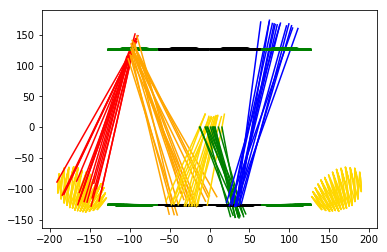

In [27]:
#E10
pl.plot(X11,Y11, color = 'gold')
pl.plot(X12,Y12, color = 'gold')
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 250) #global
    pl.plot(x,y, color = 'red')
#E9
pl.plot(X9n,Y9n, color = 'green')
pl.plot(X10n,Y10n, color = 'green')
#E8
pl.plot(X9,Y9, color = 'green')
pl.plot(X10,Y10, color = 'green')
for i in range (0,len(p810)):
    x,y,z = ML(p810[i], v810[i], 263)
    pl.plot(x,y, color = 'Orange')
#E1
pl.plot(X1,Y1, color = 'black')
pl.plot(X2,Y2, color = 'black')
#E3
pl.plot(X1n,Y1n, color = 'black')
pl.plot(X2n,Y2n, color = 'black')
for i in range (0,len(p38)):
    x,y,z = ML(p38[i], v38[i], 150)
    pl.plot(x,y, color = 'gold')
#MIRROR
for i in range (0,len(pm3)):
    x,y,z = ML(pm3[i], vm3[i], 150)
    pl.plot(x,y, color = 'green')
#E4
pl.plot(X3n,Y3n, color = 'black')
pl.plot(X4n,Y4n, color = 'black')
for i in range (0,len(p4m)):
    x,y,z = ML(p4m[i], v4m[i], 300)
    pl.plot(x,y, color = 'blue')
#for i in range (len(sMhit)):
    #x,y,z = ML(sMhit[i],sVhit[i],100)
    #pl.plot(x,y, color = 'blue')
#E2
pl.plot(X3,Y3, color = 'black')
pl.plot(X4,Y4, color = 'black')
#E5
pl.plot(X5,Y5, color = 'green')
pl.plot(X6,Y6, color = 'green')
#for i in range (0,len(p54)):
    #x,y,z = ML(p54[i], v54[i], 263)
    #pl.plot(x,y, color = 'violet')
#E6
pl.plot(X5n,Y5n, color = 'green')
pl.plot(X6n,Y6n, color = 'green')
#E7
pl.plot(X7,Y7, color = 'gold')
pl.plot(X8,Y8, color = 'gold')
#for i in range (0,len(p75)):
    #x,y,z = ML(p75[i], v75[i], 263)
    #pl.plot(x,y, color = 'purple')

pl.show()

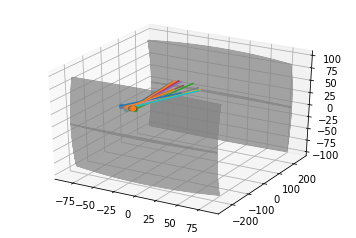

In [8]:
#ELLIPSE 5&6 LOCAL 5
pl3dsurf = pl.figure().gca(projection = '3d')
X5i,Y5i,Z5i,X6i,Y6i,Z6i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #L
pl3dsurf.plot(X5i,Y5i,Z5i, color= 'grey',alpha=0.7)
pl3dsurf.plot(X6i,Y6i,Z6i,color= 'grey',alpha=0.7)
pl3dsurf.plot(X5ni,Y5ni,Z5ni,color= 'grey',alpha=0.7)
pl3dsurf.plot(X6ni,Y6ni,Z6ni,color= 'grey',alpha=0.7)
for i in range (len(sp4t)): #LOCAL 5
    x,y,z = sp4t[i][0],sp4t[i][1],sp4t[i][2]
    pl3dsurf.scatter(x,y,z)
for i in range (len(sp4t)): #LOCAL 5
    x,y,z =  ML(sp4t[i],v4t[i],250)
    pl3dsurf.plot(x,y,z)
pl.show()


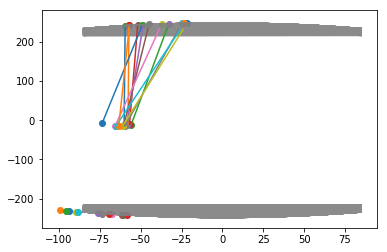

12

In [9]:
pl.plot(X5i,Y5i, color= 'grey',alpha=0.7)
pl.plot(X6i,Y6i,color= 'grey',alpha=0.7)
pl.plot(X5ni,Y5ni,color= 'grey',alpha=0.7)
pl.plot(X6ni,Y6ni,color= 'grey',alpha=0.7)
for i in range (len(sp4t)):
    x,y,z = sp4t[i][0],sp4t[i][1],sp4t[i][1]
    pl.scatter(x,y)
for i in range (len(sp4t)):
    x,y,z =  ML(sp4t[i],v4t[i],250)
    pl.plot(x,y)
for i in range (len(sp4t)):
    x,y,z = (ELI(sp4t[i],v4t[i],coeffellipse56))
    #pl.plot(x,y)
    pl.scatter(x,y)
pl.show()
#IT IS INSIDE THE ELLIPSOID SO IT SHOULD BE WORKING. 
#CLEARLY should be working. 
#is local (because Ellipsoid is centered aroung 0,0)
len(sp4t)

In [21]:
for i in range (len(sp4t)):
    x1, y1, z1 = (ELI1(sp4t[i],v4t[i],coeffellipse56))
    x2,y2,z2 = (ELI2(sp4t[i],v4t[i],coeffellipse56))
    print(z1[0] - z2[0])
    print(z1[1] - z2[1])

3.60321452758
-8.20441494973
-6.64183000934
8.46744519165
0.570930250045
-1.07141642989
-1.45397184728
2.0021333654
-0.602239167902
0.851485855753
-0.800234725551
1.35566076194
-0.149580406691
0.314732926896
2.0477694829
-6.65458753472
nan
nan


/Users/Lab/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
